In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
theta = 0
sigma = 1
n = 50

In [38]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1 ,2]

In [3]:
weights_unbiased_3 = np.random.rand(n)

In [4]:
theta_hat = norm.rvs(theta, sigma, n)

In [32]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

def weight_4_gen(i):
        return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = np.array([weight_4_gen(i) for i in range(1, n + 1)])
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

In [33]:
res = []
for _ in range(1000):
    theta_hat = norm.rvs(theta, sigma, n)
    res.append([
        est_1(theta_hat),
        est_2(theta_hat),
        est_3(theta_hat, weights_unbiased_3),
        est_4(theta_hat, n),
        est_5(theta_hat, n),
        est_6(theta_hat),
        est_7(theta_hat)
    ])

In [34]:
res_df = pd.DataFrame(res, columns=['1', '2', '3', '4', '5', '6', '7'])

In [35]:
res_df

,1,2,3,4,5,6,7
0,-0.227398,-0.316476,-0.315942,0.818687,-0.188609,-0.491294,0.866336
1,-0.340075,-0.371463,-0.344797,0.939541,5.917812,-0.924575,1.008445
2,0.153474,0.172859,0.083324,1.111627,0.410655,0.966284,1.130977
3,0.001045,0.137064,0.060181,0.997783,0.469690,-0.627077,1.018191
4,0.049473,-0.060955,0.035001,0.812164,-0.091675,0.632080,0.831597
...,...,...,...,...,...,...,...
995,0.163158,0.271384,0.045836,1.126360,1.245223,0.824305,1.148248
996,-0.069928,-0.147373,-0.232020,1.126418,-0.421678,-0.721999,1.140867
997,-0.204104,-0.271546,-0.202685,0.976919,0.120709,-0.741706,1.004590
998,-0.071705,0.018673,-0.188675,0.835216,7.897346,-0.739790,0.850263


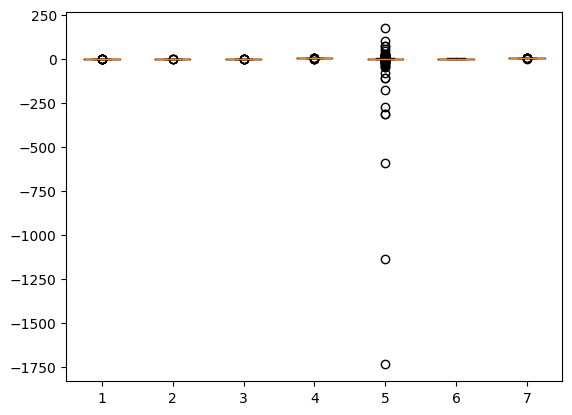

In [36]:
plt.boxplot(res_df)
plt.show()

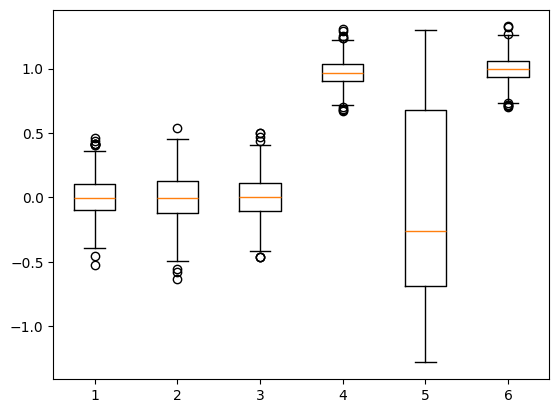

In [37]:
dropped_5_df = res_df.drop('5', axis=1)
plt.boxplot(dropped_5_df)
plt.show()

In [41]:
# 4 estymator powininen byc kolo 0

In [ ]:
# do zrobienia do konca to zadanie

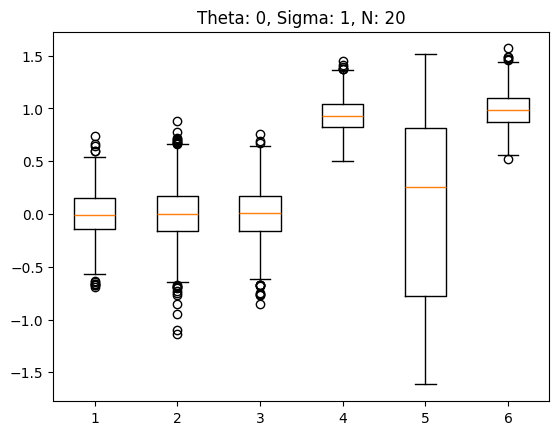

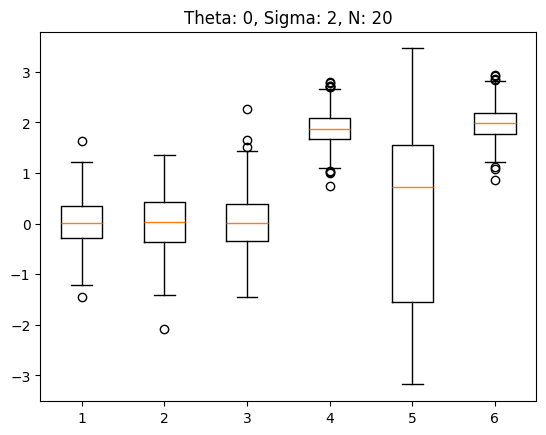

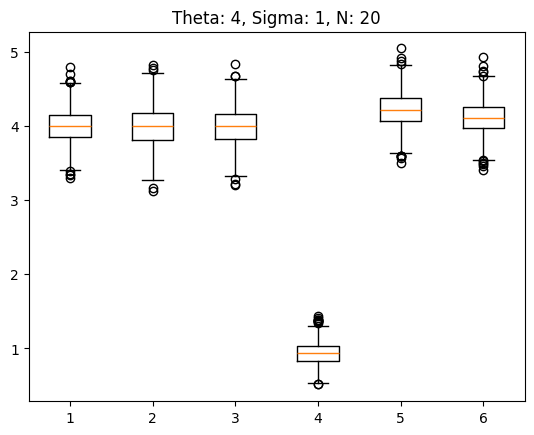

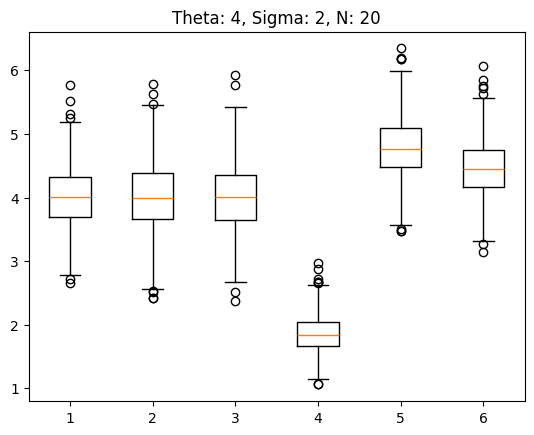

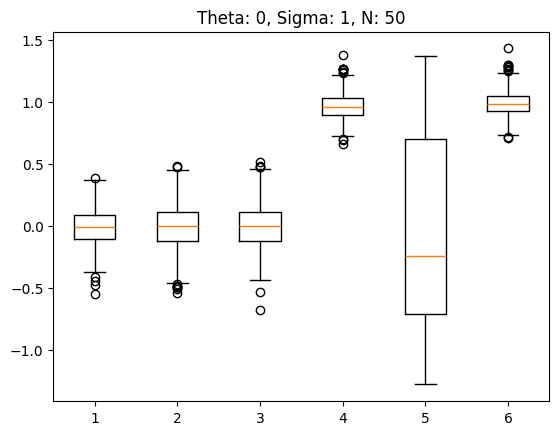

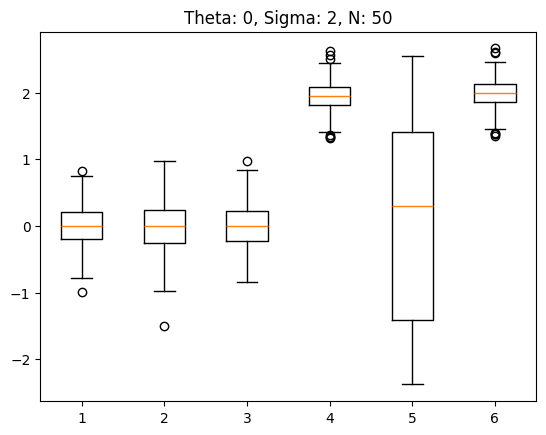

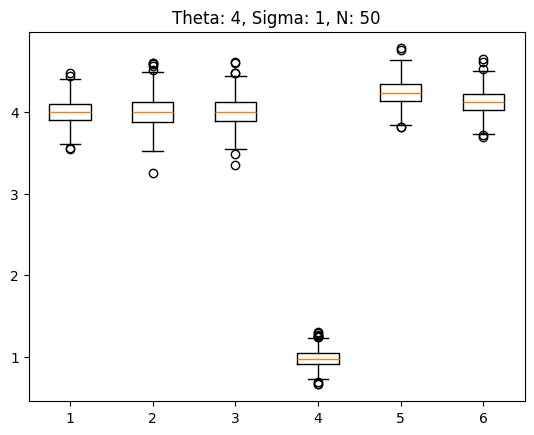

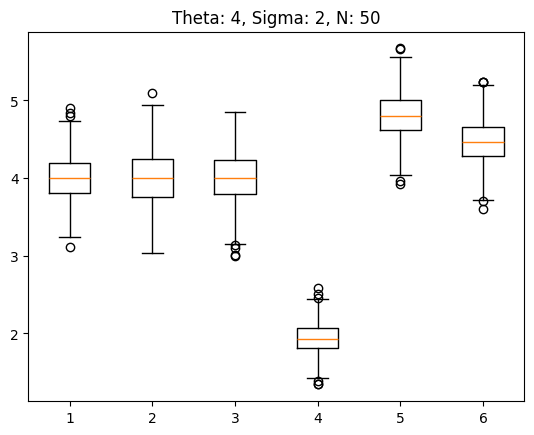

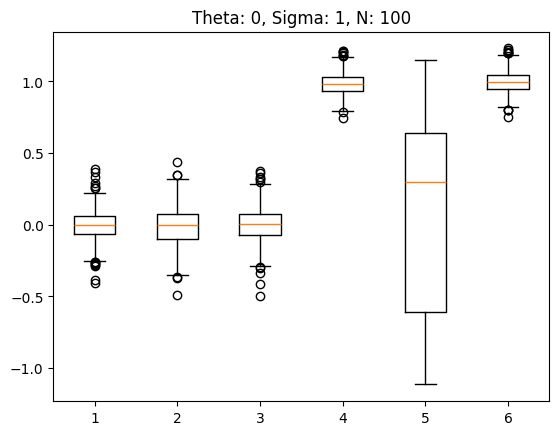

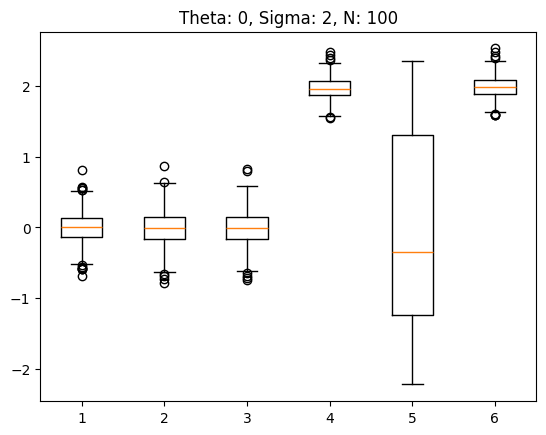

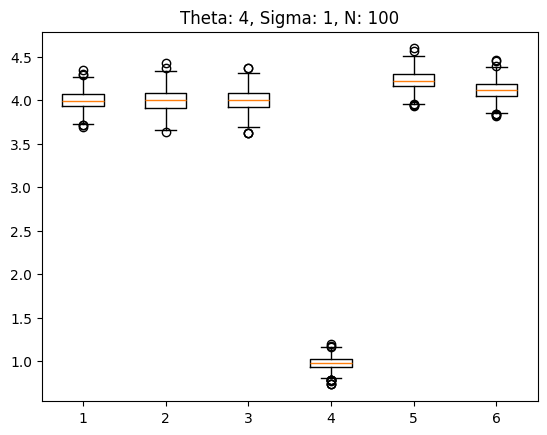

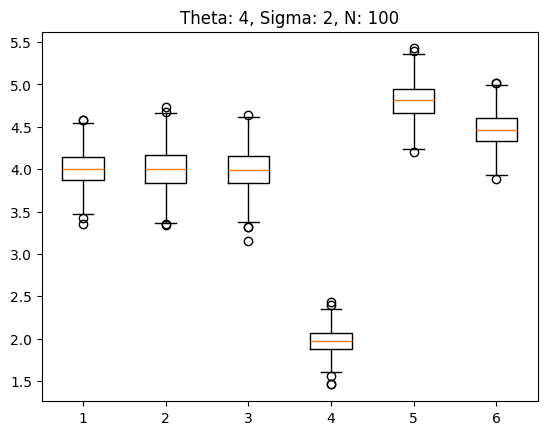

In [40]:
for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]
        weights_unbiased_3 = np.random.rand(n)
        res = []
        for _ in range(1000):
            theta_hat = norm.rvs(theta, sigma, n)
            res.append([
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                #est_5(theta_hat, n), without est5
                est_6(theta_hat),
                est_7(theta_hat)
            ])
        res_df = pd.DataFrame(res, columns=['1', '2', '3', '4', '6', '7'])
        plt.boxplot(res_df)
        plt.title(f'Theta: {theta}, Sigma: {sigma}, N: {n}')
        plt.show()
